# Loading data directly from ESGF nodes

* This notebook demonstrates searching for and loading CMIP simulations from ESGF, using the <a href="https://github.com/esgf2-us/intake-esgf" style="color: blue; text-decoration: underline;">intake_esgf</a> package.
* This code is taken from the intake-esgf <a href="https://intake-esgf.readthedocs.io/en/latest/beginner.html" style="color: blue; text-decoration: underline;">tutorial</a>. Please refer there for a fuller explanation of each step. 
* The data search uses the standard CMIP directory structure, see <a href="https://help.ceda.ac.uk/article/4801-cmip6-data#CMIP6%20data%20structure" style="color: blue; text-decoration: underline;">here</a> for an explanation. We make use of xarray; see <a href="https://tutorial.xarray.dev/intro.html" style="color: blue; text-decoration: underline;">this turorial</a> for an introduction. 

In [5]:
# on starting the server, we need to run the line below once, as intake_esgf is not yet in our standard pangeo environment
%pip install intake_esgf

Note: you may need to restart the kernel to use updated packages.


In [5]:
import intake_esgf
cat = ESGFCatalog()

In [7]:
cat.variable_info("temperature air surface")

,cf_standard_name,variable_units,variable_long_name
variable_id,,,
hfls,surface_upward_latent_heat_flux,W m-2,Surface Upward Latent Heat Flux
hfss,surface_upward_sensible_heat_flux,W m-2,Surface Upward Sensible Heat Flux
rlds,surface_downwelling_longwave_flux_in_air,W m-2,Surface Downwelling Longwave Radiation
rsds,surface_downwelling_shortwave_flux_in_air,W m-2,Surface Downwelling Shortwave Radiation
sfcWind,wind_speed,m s-1,Near-Surface Wind Speed
ta,air_temperature,K,Air Temperature
tas,air_temperature,K,Near-Surface Air Temperature
tasmax,air_temperature,K,Daily Maximum Near-Surface Air Temperature
tasmin,air_temperature,K,Daily Minimum Near-Surface Air Temperature


In [8]:
cat.search(variable_id="tas", experiment_id="historical")

   Searching indices:   0%|          |0/2 [       ?index/s]

Summary information for 1687 results:
mip_era                                                     [CMIP6]
activity_drs                                                 [CMIP]
institution_id    [IPSL, NASA-GISS, NCAR, MPI-M, MRI, CNRM-CERFA...
source_id         [IPSL-CM6A-LR, GISS-E2-1-H, CESM2, GISS-E2-1-G...
experiment_id                                          [historical]
member_id         [r9i1p1f1, r7i1p1f1, r4i1p1f1, r27i1p1f1, r5i1...
table_id          [ImonGre, ImonAnt, Amon, day, 3hr, 6hrPlevPt, ...
variable_id                                                   [tas]
grid_label                             [grg, gra, gr, gn, gr1, gr2]
dtype: object

In [9]:
cat.search(
    project='CMIP6',
    experiment_id='historical',
    source_id='CESM2',
    variable_id='tas',  # surface air temperature
    table_id='Amon',    # monthly atmospheric data
    variant_label='r1i1p1f1'  # ensemble member
)

   Searching indices:   0%|          |0/2 [       ?index/s]

Summary information for 1 results:
mip_era                [CMIP6]
activity_drs            [CMIP]
institution_id          [NCAR]
source_id              [CESM2]
experiment_id     [historical]
member_id           [r1i1p1f1]
table_id                [Amon]
variable_id              [tas]
grid_label                [gn]
dtype: object

In [10]:
dsd = cat.to_dataset_dict() # dsd is a dictionary of xarray datasets

Get file information:   0%|          |0/2 [       ?index/s]

tas_Amon_CESM2_historical_r1i1p1f1_gn...:   0%|          |0.00/243M [?B/s]

Adding cell measures:   0%|          |0/1 [     ?dataset/s]

areacella_fx_CESM2_historical_r1i1p1f...:   0%|          |0.00/43.8k [?B/s]

In [21]:
ds = dsd['tas'] # DataSet: subsetting the dictionary on the variable name gives the xarray DataSet containing the tas data
da = dsd['tas']['tas'] # DataArray: selecting the variable tas on the DataSet gives the xarray DataArray of tas data
print('DataSet dictionary: ', dsd) 
print('DataSet: ', ds) # 
print('DataArray: ', da) # 

DataSet dictionary:  {'tas': <xarray.Dataset> Size: 438MB
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time       (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 438MB 245.3 245.3 245.3 ... 245.0 245.0
    time_bnds  (time, nbnd) object 32kB ...
    lat_bnds   (lat, nbnd) float32 2kB ...
    lon_bnds   (lon, nbnd) float32 2kB ...
    areacella  (lat, lon) float32 221kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:34:05Z
    ...                     ...
 

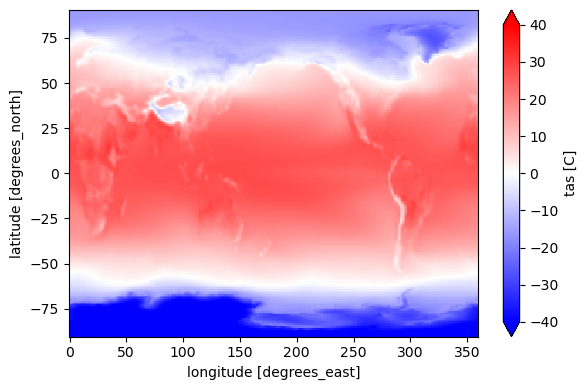

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ds = dsd["tas"]["tas"].mean(dim="time") - 273.15  # to [C]
ds.plot(ax=ax, cmap="bwr", vmin=-40, vmax=40, 
        extend='both',cbar_kwargs={"label": "tas [C]"})


## Widening search criteria if data aren't found

The default is for intake-esgf NOT to search over all possible sources of data (for performance reasons). But this means we may come back empty handed on a search when in fact the simulation data is available somewhere. 

for example, the code below will throw a "NoSearchResults" errror even though this simulation is available on the CEDA ESGF node:

In [3]:
cat.search(
    project='CMIP6',
    experiment_id='G6sulfur',
    source_id='UKESM1-0-LL',
    variable_id='tas',  # surface air temperature
    table_id='Amon',    # monthly atmospheric data
    variant_label=['r1i1p1f2']  # ensemble member
)

   Searching indices:   0%|          |0/2 [       ?index/s]

NoSearchResults: 

The solution is to run the following two lines, which turn on all ESGF nodes for the search:

In [6]:
## run the following line to widen search criteria to include all ESGF nodes
intake_esgf.conf.set(all_indices=True)
cat = ESGFCatalog()


cat.search(
    project='CMIP6',
    experiment_id='G6sulfur',
    source_id='UKESM1-0-LL',
    variable_id='tas',  # surface air temperature
    table_id='Amon',    # monthly atmospheric data
    variant_label=['r1i1p1f2']  # ensemble member
)

   Searching indices:   0%|          |0/9 [       ?index/s]

Summary information for 1 results:
mip_era                 [CMIP6]
activity_drs           [GeoMIP]
institution_id           [MOHC]
source_id         [UKESM1-0-LL]
experiment_id        [G6sulfur]
member_id            [r1i1p1f2]
table_id                 [Amon]
variable_id               [tas]
grid_label                 [gn]
dtype: object